<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Model</div>

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold, cross_val_score
import warnings
warnings.simplefilter('ignore')

2023-12-30 10:09:32.116522: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-30 10:09:32.354726: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-30 10:09:32.354828: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-30 10:09:32.378583: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-30 10:09:32.449004: I tensorflow/core/platform/cpu_feature_guar

## Read csv file

In [2]:
df = pd.read_csv('data_footballer_processed.csv', parse_dates=['Birth Date'])
df.head(10)

,Name,Height,Weight,Preferred Foot,Birth Date,Age,Nation,Club,League,Preferred Positions,...,POT,Value,Wage,Ball Skills,Defence,Mental,Passing,Physical,Shooting,Goalkeeper
0,Erling Haaland,195,94,Left,2000-07-21,23,Norway,Manchester City,England Premier League (1),ST,...,94,157000000.0,340000.0,80.5,38.0,80.2,59.0,83.7,84.0,10.4
1,Kylian Mbappé,182,75,Right,1998-12-20,24,France,Paris Saint-Germain,France Ligue 1 (1),"ST, LW",...,94,153500000.0,225000.0,92.5,33.0,76.7,78.3,89.0,82.2,8.4
2,Kevin De Bruyne,181,75,Right,1991-06-28,32,Belgium,Manchester City,England Premier League (1),"CM, CAM",...,91,103000000.0,350000.0,89.0,61.5,84.0,94.3,75.7,83.1,11.2
3,Harry Kane,188,85,Right,1993-07-28,30,England,Bayern München,Germany 1. Bundesliga (1),ST,...,90,119500000.0,170000.0,84.5,42.0,81.3,85.0,75.9,86.5,10.8
4,Thibaut Courtois,199,96,Left,1992-05-11,31,Belgium,Real Madrid,Spain Primera Division (1),GK,...,90,63000000.0,250000.0,18.0,17.0,41.5,27.3,54.0,22.4,86.6
5,Robert Lewandowski,185,81,Right,1988-08-21,35,Poland,FC Barcelona,Spain Primera Division (1),ST,...,90,58000000.0,340000.0,88.0,30.5,81.0,76.7,81.1,87.8,10.2
6,Karim Benzema,185,81,Right,1987-12-19,35,France,Al Ittihad,Saudi Pro League (1),"CF, ST",...,90,51000000.0,95000.0,89.0,21.0,77.7,80.0,79.3,84.6,8.2
7,Lionel Messi,169,67,Left,1987-06-24,36,Argentina,Inter Miami,USA Major League Soccer (1),"CF, CAM",...,90,41000000.0,23000.0,94.5,29.5,75.2,88.0,79.4,83.6,10.8
8,Rúben Dias,187,82,Right,1997-05-14,26,Portugal,Manchester City,England Premier League (1),CB,...,90,97500000.0,250000.0,69.5,89.0,73.2,71.0,70.1,48.4,9.4
9,Vini Jr.,176,73,Right,2000-07-12,23,Brazil,Real Madrid,Spain Primera Division (1),LW,...,94,121500000.0,310000.0,91.0,21.5,69.5,78.3,84.3,71.4,7.2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10020 entries, 0 to 10019
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Name                 10020 non-null  object        
 1   Height               10020 non-null  int64         
 2   Weight               10020 non-null  int64         
 3   Preferred Foot       10020 non-null  object        
 4   Birth Date           10020 non-null  datetime64[ns]
 5   Age                  10020 non-null  int64         
 6   Nation               10020 non-null  object        
 7   Club                 10020 non-null  object        
 8   League               10020 non-null  object        
 9   Preferred Positions  10020 non-null  object        
 10  OVR                  10020 non-null  int64         
 11  POT                  10020 non-null  int64         
 12  Value                10020 non-null  float64       
 13  Wage                 10020 non-

## Model

- **We create a model to predict Value of a footballer**, there are features in dataset that influence the target variable `Value`:
  - Height
  - Weight
  - Nation
  - League
  - Preferred Positions
  - Age
  - OVR
  - POT
  - Ball Skill
  - Defence
  - Mental
  - Passing
  - Physical
  - Shooting
  - Goalkeeper
- Predicting the value of a footballer is a regression task where the goal is to estimate a continuous variable (e.g., the monetary value of the player). Different regression algorithms can be considered for this task, including **Decision Tree Regression**, **Linear Regression**, and **Random Forest Regression**.
- Here's a detailed explanation of why you might choose each of these algorithms:
  - **Linear Regression**: Linear Regression is a simple and interpretable algorithm that assumes a linear relationship between the features and the target variable. It's suitable when the relationship between the features and the target is approximately linear.
  - **Decision Tree Regression**: Decision trees are versatile and can capture non-linear relationships in the data. They are useful when the relationship between features and the target is complex and non-linear.
  - **Random Forest Regression**: Random Forest is an ensemble method that builds multiple decision trees and averages their predictions. It is robust, handles complex relationships well, and is less prone to overfitting than a single decision tree.


### Preprocessing

- Categorical variables, such as `League`, `Nation`, and `Preferred Positions`, can significantly influence the target variable `Value` in a dataset.
- In the context of a machine learning model, these categorical features often hold valuable information about the characteristics of entities like players in a sports dataset.
- To incorporate these categorical variables into a machine learning model, it's essential to encode them appropriately.
- One common method is one-hot encoding, which transforms categorical variables into a binary format, creating binary columns for each category. This encoding preserves the distinctiveness of categories while allowing the model to effectively use them as features for predicting the target variable.

In [4]:
# encode columns league and nation
one_hot_nation_league_df = pd.get_dummies(df[['League', 'Nation']])
# encode column position
position_df = df['Preferred Positions']
one_hot_position_df = position_df.str.get_dummies(', ')
# custom order from GK -> ST
custom_order = ['GK', 'LWB', 'LB', 'CB', 'RB', 'RWB', 'CDM', 'CM', 'LM', 'RM', 'CAM', 'LW', 'RW', 'CF', 'ST']
one_hot_position_df = one_hot_position_df[custom_order]
# merge encode df
one_hot_df = one_hot_nation_league_df.merge(one_hot_position_df, left_index=True, right_index=True)
one_hot_df

,League_Argentina Primera Division (1),League_Australia A-League (1),League_Austria Bundesliga (1),League_Belgium Pro League (1),League_CONMEBOL Libertadores,League_CONMEBOL Sudamericana,League_China Super League (1),League_Denmark Superliga (1),League_England Championship (2),League_England League One (3),...,RWB,CDM,CM,LM,RM,CAM,LW,RW,CF,ST
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10016,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
10017,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
10018,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- Merge one_hot with numeric columns in df

In [5]:
numeric_columns = ['Height', 'Weight', 'Age', 'OVR', 'POT', 'Ball Skills', 'Defence', 'Mental', 'Passing', 'Physical', 'Shooting', 'Goalkeeper']
numeric_df = df[numeric_columns]
encoded_df = numeric_df.merge(one_hot_df, left_index=True, right_index=True)
encoded_df

,Height,Weight,Age,OVR,POT,Ball Skills,Defence,Mental,Passing,Physical,...,RWB,CDM,CM,LM,RM,CAM,LW,RW,CF,ST
0,195,94,23,91,94,80.5,38.0,80.2,59.0,83.7,...,0,0,0,0,0,0,0,0,0,1
1,182,75,24,91,94,92.5,33.0,76.7,78.3,89.0,...,0,0,0,0,0,0,1,0,0,1
2,181,75,32,91,91,89.0,61.5,84.0,94.3,75.7,...,0,0,1,0,0,1,0,0,0,0
3,188,85,30,90,90,84.5,42.0,81.3,85.0,75.9,...,0,0,0,0,0,0,0,0,0,1
4,199,96,31,90,90,18.0,17.0,41.5,27.3,54.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10015,191,87,21,65,75,16.5,12.5,30.0,31.3,40.4,...,0,0,0,0,0,0,0,0,0,0
10016,177,68,20,65,81,66.0,58.0,58.7,60.7,70.7,...,1,0,0,0,0,0,0,0,0,0
10017,170,60,23,65,74,65.0,58.5,60.3,59.0,58.4,...,0,0,1,0,0,0,0,0,0,0
10018,187,77,25,65,72,48.0,67.5,55.2,52.0,63.1,...,0,0,0,0,0,0,0,0,0,0


## Data Modelling

### Split dataset for training and testing.

In [6]:
# Define X, y
X = encoded_df
y = df['Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree Regression

####  Training model

- Training a Decision Tree Regression model on the `X_train` and `y_train` 

In [7]:
my_tree = DecisionTreeRegressor()
my_tree.fit(X_train, y_train)

DecisionTreeRegressor()

- Predict `X_test`, store in `y_pred`

In [8]:
y_pred = my_tree.predict(X_test)

- Excute mean square error and root mean squared error

In [9]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4609989280106.454


In [10]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'Root mean Squared Error: {rmse}')

Root mean Squared Error: 2147088.5589808477


### Linear Regression

####  Training model

- Training a Linear Regression model on the `X_train` and `y_train` 

In [11]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

- Predict `X_test`, store in `linear_pred`

In [12]:
linear_pred = linear_reg.predict(X_test)

- Excute mean square error and root mean squared error

In [13]:
linear_mse = mean_squared_error(y_test, linear_pred)
print(f'Mean Squared Error: {linear_mse}')

Mean Squared Error: 9.116700704442162e+30


In [14]:
linear_rmse = mean_squared_error(y_test, linear_pred, squared=False)
print(f'Root mean Squared Error: {linear_rmse}')

Root mean Squared Error: 3019387471730344.5


### Random Forest Regression

####  Training model

- Training a Random Forest Regression model on the `X_train` and `y_train`

In [15]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)

RandomForestRegressor()

- Predict `X_test`, store in `rf_pred`

In [16]:
rf_pred = rf_reg.predict(X_test)

- Excute mean square error and root mean squared error

In [17]:
rf_mse = mean_squared_error(y_test, rf_pred)
print(f'Mean Squared Error: {rf_mse}')

Mean Squared Error: 2843159212743.114


In [18]:
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
print(f'Root mean Squared Error: {rf_rmse}')

Root mean Squared Error: 1686167.0180451027


### Neural network Regression

####  Training model

- Scale data and build model.

In [19]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = Sequential()
model.add(Dense(128, input_dim=206, activation='relu'))
model.add(Dense(64, activation='relu'))
#Output layer
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               26496     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 34,817
Trainable params: 34,817
Non-trainable params: 0
_________________________________________________________________


- Training a Neural Network model on the `X_train_scaled` and `y_train`

In [20]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

Epoch 1/100
176/176 [==============================] - 1s 5ms/step - loss: 77158693208064.0000 - mae: 3765595.2500 - val_loss: 67192188043264.0000 - val_mae: 3607098.7500
Epoch 2/100
176/176 [==============================] - 1s 6ms/step - loss: 77122613805056.0000 - mae: 3763592.5000 - val_loss: 67122189303808.0000 - val_mae: 3602918.0000
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 76984034000896.0000 - mae: 3755881.5000 - val_loss: 66923995856896.0000 - val_mae: 3591273.7500
Epoch 4/100
176/176 [==============================] - 0s 3ms/step - loss: 76693301624832.0000 - mae: 3739295.5000 - val_loss: 66577961582592.0000 - val_mae: 3570850.0000
Epoch 5/100
176/176 [==============================] - 1s 3ms/step - loss: 76195001532416.0000 - mae: 3712219.5000 - val_loss: 65995456643072.0000 - val_mae: 3536481.0000
Epoch 6/100
176/176 [==============================] - 1s 3ms/step - loss: 75440395911168.0000 - mae: 3669133.0000 - val_loss: 65185834336256.000

In [21]:
nn_pred = model.predict(X_test_scaled)
nn_pred

94/94 [==============================] - 0s 1ms/step


array([[   1772.9578],
       [   1772.9578],
       [  45805.906 ],
       ...,
       [   1772.9578],
       [1569462.9   ],
       [   1772.9578]], dtype=float32)

- Excute mean square error and root mean squared error

In [22]:
nn_mse, nn_mae = model.evaluate(X_test_scaled, y_test)
nn_rmse = math.sqrt(nn_mse)
print('Mean squared error: ', nn_mse)
print('Root mean Squared Error: ', nn_rmse)
print('Mean absolute error: ', nn_mae)

94/94 [==============================] - 0s 1ms/step - loss: 37380262199296.0000 - mae: 2552945.0000
Mean squared error:  37380262199296.0
Root mean Squared Error:  6113939.9898343785
Mean absolute error:  2552945.0


## Model Evaluation

### Decision Tree Regression

#### Cross-validation

In [23]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
tree_scores = cross_val_score(my_tree, X_train, y_train, scoring='neg_mean_squared_error', cv = cv)
tree_scores

array([-6.00365354e+12, -1.06584338e+12, -7.56450041e+12, -2.17116109e+12,
       -4.43610706e+12])

#### Average Mean Squared Error

In [24]:
tree_mse_scores = -tree_scores
print(f'Mean Squared Error Scores: {tree_mse_scores}')
tree_avg_mse_scores = np.mean(tree_mse_scores)
print(f'Average Mean Squared Error: {tree_avg_mse_scores}')

Mean Squared Error Scores: [6.00365354e+12 1.06584338e+12 7.56450041e+12 2.17116109e+12
 4.43610706e+12]
Average Mean Squared Error: 4248253096650.035


#### Model Visualization

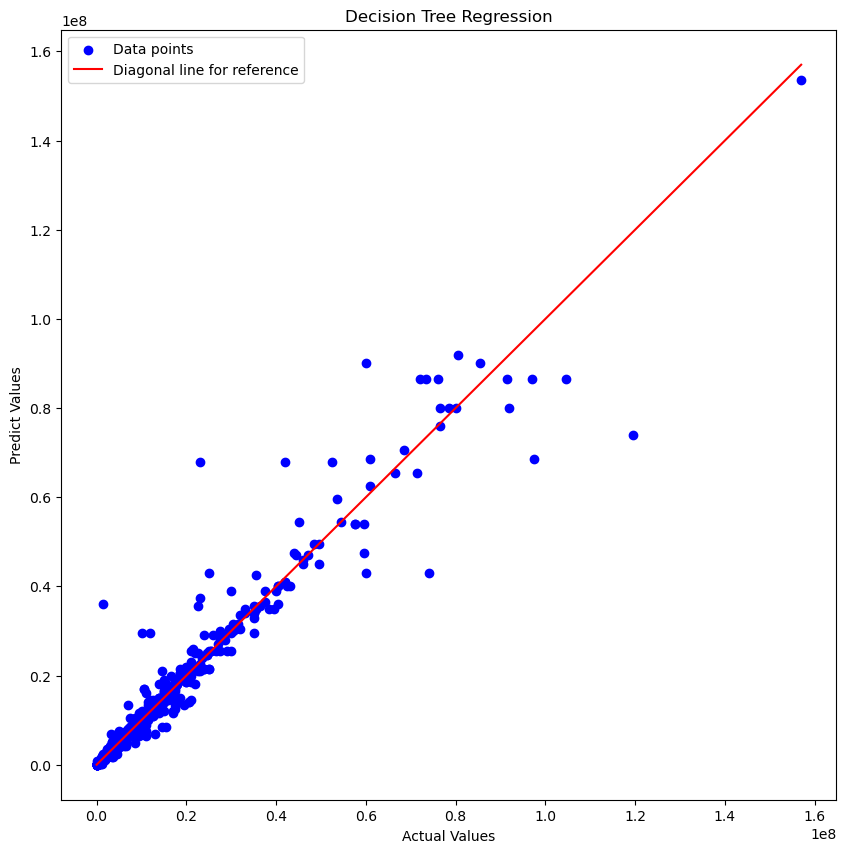

In [25]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Diagonal line for reference')
plt.plot()
plt.xlabel('Actual Values')
plt.ylabel('Predict Values')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

### Linear Regression

#### Cross-validation

In [26]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
linear_scores = cross_val_score(linear_reg, X, y, scoring='neg_mean_squared_error', cv=cv)
linear_scores

array([-7.94537516e+30, -3.58726647e+27, -3.82599422e+30, -1.70217723e+30,
       -4.22961232e+29])

#### Average Mean Squared Error

In [27]:
linear_mse_scores = -linear_scores
print(f'Mean Squared Error Scores: {linear_mse_scores}')
linear_avg_mse_scores = np.mean(linear_mse_scores)
print(f'Average Mean Squared Error: {linear_avg_mse_scores}')

Mean Squared Error Scores: [7.94537516e+30 3.58726647e+27 3.82599422e+30 1.70217723e+30
 4.22961232e+29]
Average Mean Squared Error: 2.7800190230561e+30


#### Model Visualization

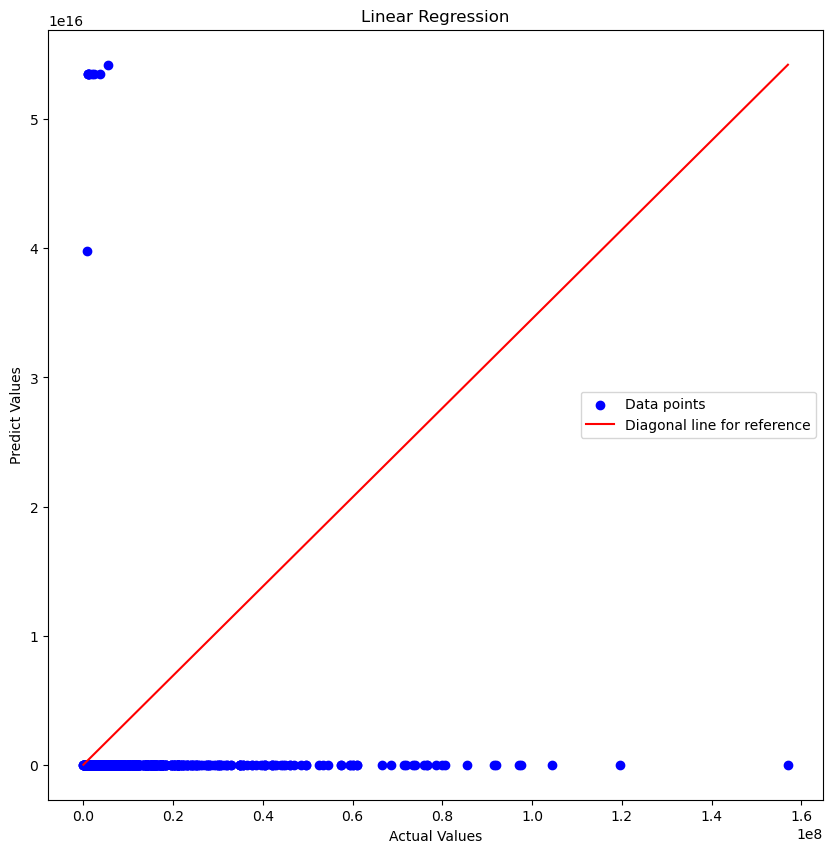

In [28]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, linear_pred, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(linear_pred), max(linear_pred)], color='red', label='Diagonal line for reference')
plt.xlabel('Actual Values')
plt.ylabel('Predict Values')
plt.title('Linear Regression')
plt.legend()
plt.show()

### Random Forest Regression

#### Cross-validation

In [29]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
rf_scores = cross_val_score(rf_reg, X_train, y_train, scoring='neg_mean_squared_error', cv = cv)
rf_scores

array([-1.95318146e+12, -1.32698401e+12, -6.64234939e+12, -1.35838279e+12,
       -1.63581053e+12])

#### Average Mean Squared Error

In [30]:
rf_mse_scores = -rf_scores
print(f'Mean Squared Error Scores: {rf_mse_scores}')
rf_avg_mse_scores = np.mean(rf_mse_scores)
print(f'Average Mean Squared Error: {rf_avg_mse_scores}')

Mean Squared Error Scores: [1.95318146e+12 1.32698401e+12 6.64234939e+12 1.35838279e+12
 1.63581053e+12]
Average Mean Squared Error: 2583341635544.633


#### Model Visualization

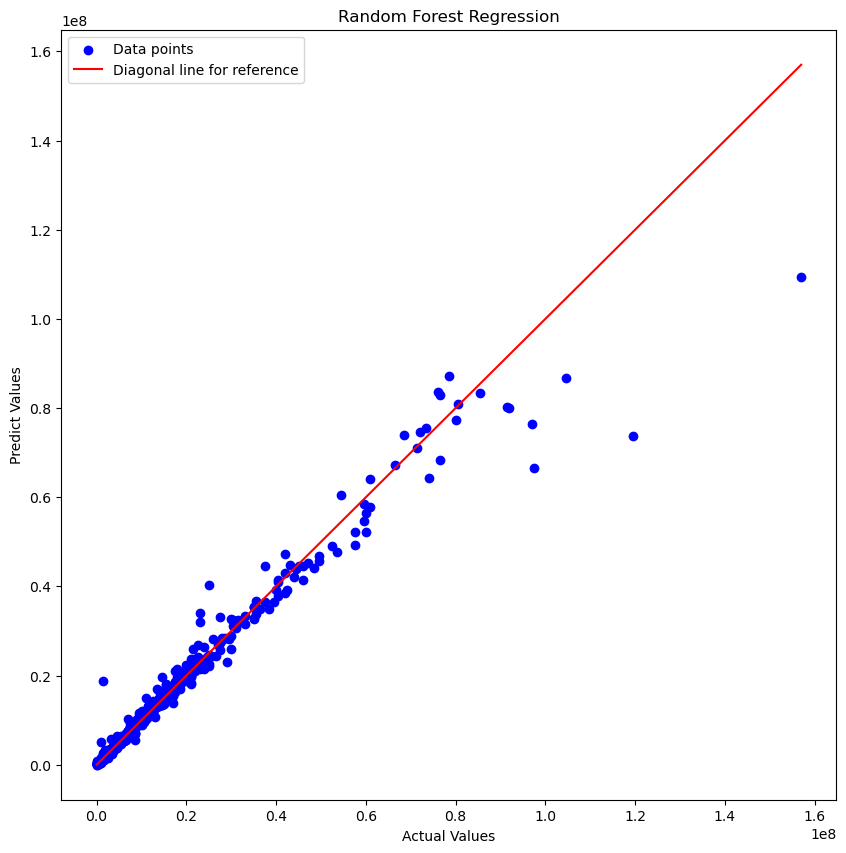

In [31]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, rf_pred, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Diagonal line for reference')
plt.xlabel('Actual Values')
plt.ylabel('Predict Values')
plt.title('Random Forest Regression')
plt.legend()
plt.show()

### Neural network Regression

#### Cross-validation

In [32]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
def create_model(optimizer='adam'):
    model = Sequential()
    model.add(Dense(128, input_dim=206, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mae'])
    return model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=32, verbose=0)
nn_scores = cross_val_score(model, X_train_scaled, y_train, scoring='neg_mean_squared_error', cv=cv)
nn_scores

array([-2.40788324e+13, -1.59377733e+13, -3.28896671e+13, -1.58595558e+13,
       -2.41509190e+13])

#### Average Mean Squared Error

In [33]:
nn_mse_scores = -nn_scores
print(f'Mean Squared Error Scores: {nn_mse_scores}')
nn_avg_mse_scores = np.mean(nn_mse_scores)
print(f'Average Mean Squared Error: {nn_avg_mse_scores}')

Mean Squared Error Scores: [2.40788324e+13 1.59377733e+13 3.28896671e+13 1.58595558e+13
 2.41509190e+13]
Average Mean Squared Error: 22583349504019.457


#### Model Visualization

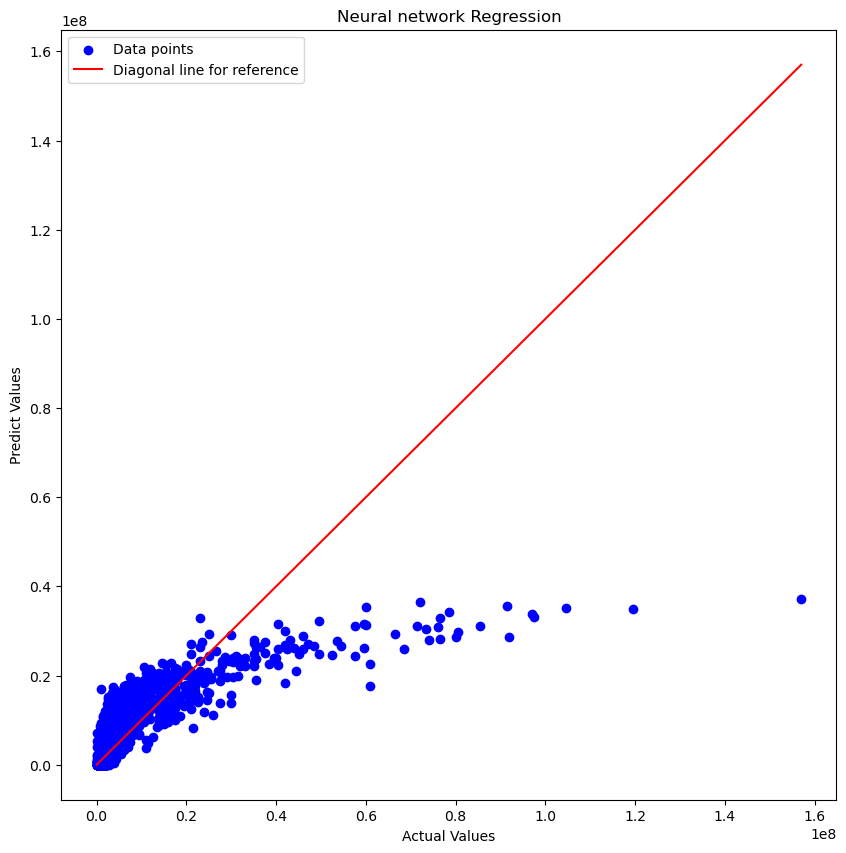

In [34]:
fig = plt.figure(figsize=(10, 10))
plt.scatter(y_test, nn_pred, color='blue', label='Data points')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Diagonal line for reference')
plt.xlabel('Actual Values')
plt.ylabel('Predict Values')
plt.title('Neural network Regression')
plt.legend()
plt.show()

## Model Tuning with Hyperparameters

### Find hyperparameters

**Random Forest Regression**

In [35]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [20, 30, 40],
    'max_features': [None,'log2', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 100],
    'n_estimators': [10, 50, 100]
}

In [36]:
grid_search_rf_reg = GridSearchCV(estimator = rf_reg, param_grid = param_grid, cv = 5, scoring='neg_mean_squared_error')

In [37]:
grid_search_rf_reg.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'bootstrap': [True, False], 'max_depth': [20, 30, 40],
                         'max_features': [None, 'log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 100],
                         'n_estimators': [10, 50, 100]},
             scoring='neg_mean_squared_error')

**Decision Tree Regression**

In [38]:
param_grid = {
    'max_depth': [10, 15, 20],
    'max_features': ['log2', 'sqrt', None],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 4, 6],
}

In [39]:
grid_search_decision_tree_reg = GridSearchCV(estimator = my_tree, param_grid = param_grid, cv = 5,scoring='neg_mean_squared_error')

In [40]:
grid_search_decision_tree_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10, 15, 20],
                         'max_features': ['log2', 'sqrt', None],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6]},
             scoring='neg_mean_squared_error')

**Neural Network**

### Choose the best model

**Random Forest Regression**

In [41]:
print(grid_search_rf_reg.best_params_)

{'bootstrap': True, 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [42]:
rf = RandomForestRegressor(bootstrap=grid_search_rf_reg.best_params_['bootstrap'],
                           max_depth=grid_search_rf_reg.best_params_['max_depth'],
                           max_features=grid_search_rf_reg.best_params_['max_features'],
                           min_samples_leaf=grid_search_rf_reg.best_params_['min_samples_leaf'],
                           min_samples_split=grid_search_rf_reg.best_params_['min_samples_split'],
                           n_estimators=grid_search_rf_reg.best_params_['n_estimators'])
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, max_features=None, min_samples_leaf=2,
                      min_samples_split=5)

In [43]:
rf_pred = rf.predict(X_test)

- Excute mean square error and root mean squared error

In [44]:
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mse

3018422928968.584

In [45]:
rf_rmse = mean_squared_error(y_test, rf_pred, squared=False)
rf_rmse

1737360.9092438405

**Decision Tree Regression**

In [46]:
print(grid_search_decision_tree_reg.best_params_)

{'max_depth': 15, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 4}


In [47]:
dt = DecisionTreeRegressor(max_depth=grid_search_decision_tree_reg.best_params_['max_depth'],
                           max_features=grid_search_decision_tree_reg.best_params_['max_features'],
                           min_samples_leaf=grid_search_decision_tree_reg.best_params_['min_samples_leaf'],
                           min_samples_split=grid_search_decision_tree_reg.best_params_['min_samples_split'])
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=4)

In [48]:
dt_pred = dt.predict(X_test)

- Excute mean square error and root mean squared error

In [49]:
dt_mse = mean_squared_error(y_test, dt_pred)
dt_mse

4655902563432.925

In [50]:
dt_rmse = mean_squared_error(y_test, dt_pred, squared=False)
dt_rmse

2157754.0553624094

In [51]:
data = [linear_rmse, dt_rmse, rf_rmse, nn_rmse]
index = ['Linear Regression','Decision Tree Regression','Random Forest Regression', 'Neural network Regression']
rmse_df = pd.DataFrame(data = data, index = index)
rmse_df.columns = ['rmse']
rmse_df.index.name = 'Model'
rmse_df

,rmse
Model,
Linear Regression,3.019387e+15
Decision Tree Regression,2.157754e+06
Random Forest Regression,1.737361e+06
Neural network Regression,6.113940e+06


##### Conclusion:

- Root mean squared error of Random Forest Regression Model is smallest so Random Forest Regression Model is considered the best Model of all.